In [1]:
import pandas as pd
data = pd.read_csv("./data.csv")

In [2]:
#different looks at the data
data
list(data)
data.shape

(569, 33)

In [3]:
#using the data.iloc, pull the thrid and foruth.. columns 2&3
#iloc will not include the last index...in this case 4 (column4)
x = data.iloc[:,2:4]

#pull the y variable M or B
y = data.iloc[:,1]

#put these into a numpy array
x = x.values
y = y.values


In [4]:
#split data into x, y, training and testing data sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1693)

In [5]:
#scale the x data to help with modeling
from sklearn.preprocessing import StandardScaler
scale_x = StandardScaler()
x_train = scale_x.fit_transform(x_train)
x_test = scale_x.transform(x_test)



In [6]:
from sklearn.linear_model import LogisticRegression
#logistic regression, project the probability that something fits into a class

#define the logistic regression
logistic_classifier = LogisticRegression(random_state=1693)

#fit the model to the data
logistic_classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1693, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
y_pred = logistic_classifier.predict(x_test)

#look at what our model predicted
y_pred

array(['B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B'],
      dtype=object)

In [8]:
#look at the probabilities of the predictions
y_pred_probabilities = logistic_classifier.predict_proba(x_test)
y_pred_probabilities

array([[6.18472499e-01, 3.81527501e-01],
       [9.86087498e-01, 1.39125019e-02],
       [5.72135355e-01, 4.27864645e-01],
       [9.56769859e-01, 4.32301408e-02],
       [1.76486455e-01, 8.23513545e-01],
       [8.18349503e-01, 1.81650497e-01],
       [9.64766037e-01, 3.52339629e-02],
       [9.66249033e-01, 3.37509669e-02],
       [4.56633384e-02, 9.54336662e-01],
       [9.98364484e-01, 1.63551557e-03],
       [9.77499678e-01, 2.25003225e-02],
       [4.80948484e-02, 9.51905152e-01],
       [1.02717474e-01, 8.97282526e-01],
       [1.62185812e-01, 8.37814188e-01],
       [5.49073050e-03, 9.94509269e-01],
       [1.54953258e-04, 9.99845047e-01],
       [9.89413966e-01, 1.05860341e-02],
       [9.35998085e-01, 6.40019146e-02],
       [8.68797327e-05, 9.99913120e-01],
       [7.92385849e-02, 9.20761415e-01],
       [9.67201559e-01, 3.27984405e-02],
       [1.29159060e-01, 8.70840940e-01],
       [9.93566046e-01, 6.43395428e-03],
       [1.39094334e-02, 9.86090567e-01],
       [5.572385

In [9]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confMat = confusion_matrix(y_test, y_pred)
confMat

array([[75, 10],
       [ 6, 52]])

In [10]:
#Here is a nice function to display confusion matricies
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

In [11]:
print_cm(confMat, ["Benign","Malignant"])
#predictions are the rows, or left of the matrix
#ground truth are the columns, or the top of the matrix
#False positives are the bottom left
#False negitives are the top right

                 Benign Malignant 
       Benign      75.0      10.0 
    Malignant       6.0      52.0 


In [12]:
#kNN
from sklearn.neighbors import KNeighborsClassifier

#a euclidean distance is equal to the minkowski distance wih p=2
nn_classifier = KNeighborsClassifier(n_neighbors = 5, metric ="minkowski", p= 2)
nn_classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
y_pred_NN = nn_classifier.predict(x_test)
y_pred_NN

array(['B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B'],
      dtype=object)

In [14]:
y_test

array(['B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B'],
      dtype=object)

In [15]:
confMat_NN = confusion_matrix(y_test, y_pred_NN)
print_cm(confMat_NN, ["Benign", "Malignant"])

                 Benign Malignant 
       Benign      75.0      10.0 
    Malignant       9.0      49.0 


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

#def viz_cm(model, labels, fPath="outputs/vizCmOutput.png"):
def viz_cm(model, labels):
    
    x_set, y_set = x_train, y_train
    x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01), np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

    pred = model.predict(np.array([x1.ravel(), x2.ravel()]).T)

    discreteCoder = LabelEncoder()
    pred = discreteCoder.fit_transform(pred)
    plt.figure()
    plt.contourf(x1, x2, pred.reshape(x1.shape),alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Classification')
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.legend()
    
    #If you're on Jupyter Notebook, you can use this:
    #plt.show()
    #plt.savefig(fPath)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


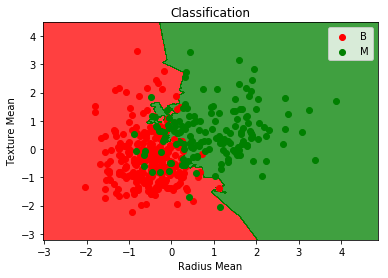

In [58]:
viz_cm(model=nn_classifier, labels=["Radius Mean", "Texture Mean"])

In [18]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel="linear", random_state=1693)
svc_classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1693, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
y_pred_svc = svc_classifier.predict(x_test)

In [23]:
y_pred_svc

array(['B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B'],
      dtype=object)

In [24]:
confMat_svc = confusion_matrix(y_test, y_pred_svc)
print_cm(confMat_svc, ["Benign", "Malignant"])

                 Benign Malignant 
       Benign      75.0      10.0 
    Malignant       6.0      52.0 


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


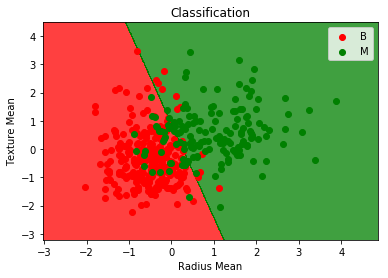

In [27]:
#visualization of SVC
viz_cm(model=svc_classifier, labels=["Radius Mean", "Texture Mean"])

In [28]:
#kernel svm

#website with kernel examples
#https://scikit-learn.org/stable/modules/svm.html

from sklearn.svm import SVC
kernelsvc_classifier = SVC(kernel="rbf", random_state=1693)
kernelsvc_classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1693, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
y_pred_svc_kernel = kernelsvc_classifier.predict(x_test)

#if you want to see the results of the prediction
#y_pred_svc_kernel
confMat_svc_kernel = confusion_matrix(y_test, y_pred_svc_kernel)
print_cm(confMat_svc_kernel, ["Benign", "Malignant"])

                 Benign Malignant 
       Benign      78.0       7.0 
    Malignant       5.0      53.0 


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


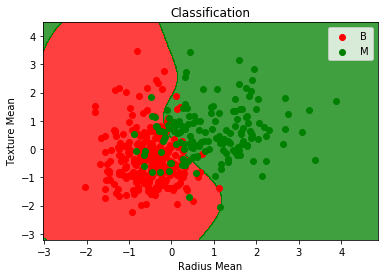

In [33]:
#visualize the prediction
viz_cm(model=kernelsvc_classifier, labels=["Radius Mean", "Texture Mean"])

In [37]:
#Answering Lab questions

#predict the classification of a tumor with radius mean of 15.78 and texture mean of 17.89
new_tumor_A = [[15.78, 17.89]]
new_tumor_A_scaled = scale_x.transform(new_tumor_A) 
new_tumor_A_prediction = kernelsvc_classifier.predict(new_tumor_A_scaled)
print("The prediction for tumor A is: "+str(new_tumor_A_prediction))

The prediction for tumor A is: ['M']


In [42]:
#Answering Lab questions


#predict the classification of a tumor with radius mean of 15.78 and texture mean of 17.89
new_tumor_B = [[15.78, 17.89]]
new_tumor_B_scaled = scale_x.transform(new_tumor_B) 
new_tumor_B_prediction = logistic_classifier.predict(new_tumor_B_scaled)
new_tumor_B_probabilities = logistic_classifier.predict_proba(new_tumor_B_scaled)
print("The prediction for tumor B is: "+str(new_tumor_B_prediction))
print("The probabilities for tumor B (Benign, Malignant) are: "+str(new_tumor_B_probabilities))

The prediction for tumor B is: ['M']
The probabilities for tumor B (Benign, Malignant) are: [[0.35477952 0.64522048]]


In [43]:

x_train.shape

(426, 2)

In [44]:
#Answering Lab questions

y_pred_NN = nn_classifier.predict(x_test)

#predict the classification of a tumor with radius mean of 17.18 and texture mean of 8.65
new_tumor_C = [[17.18, 8.65]]
new_tumor_C_scaled = scale_x.transform(new_tumor_C) 
new_tumor_C_prediction = nn_classifier.predict(new_tumor_C_scaled)
print("The prediction for tumor c is: "+str(new_tumor_C_prediction))

The prediction for tumor c is: ['B']
